# Vibe Coding: Real-World Data Cleaning Challenge

## The Mission

You're a Data Analyst at **TechSalary Insights**. Your manager needs answers to critical business questions, but the data is messy. Your job is to clean it and provide accurate insights.

**The catch:** You must figure out how to clean the data yourself. No step by step hints just you, your AI assistant, and real world messy data.

---

## The Dataset: Ask A Manager Salary Survey 2021

**Location:** `../Week-02-Pandas-Part-2-and-DS-Overview/data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.tsv`

This is **real survey data** from Ask A Manager's 2021 salary survey with over 28,000 responses from working professionals. The data comes from this survey: https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html

**Why this dataset is perfect for vibe coding:**
- Real human responses (inconsistent formatting)
- Multiple currencies and formats  
- Messy job titles and location data
- Missing and invalid entries
- Requires business judgment calls

---

## Your Business Questions

Answer these **exact questions** with clean data. There's only one correct answer for each:

### Core Questions (Required):
1. **What is the median salary for Software Engineers in the United States?** 
2. **Which US state has the highest average salary for tech workers?**
3. **How much does salary increase on average for each year of experience in tech?**
4. **Which industry (besides tech) has the highest median salary?**

### Bonus Questions (If time permits):
5. **What's the salary gap between men and women in tech roles?**
6. **Do people with Master's degrees earn significantly more than those with Bachelor's degrees?**

**Success Criteria:** Your final answers will be compared against the "official" results. Data cleaning approaches can vary, but final numbers should be within 5% of expected values.


---
# Your Work Starts Here

## Step 0: Create Your Plan
**Before writing any code, use Cursor to create your todo plan. Then paste it here:**

## My Data Cleaning Plan

- [ ] Load TSV file with pandas using tab separator and examine basic dataset info (shape, columns, dtypes)
- [ ] Check for and remove duplicate rows and obvious fake/test entries (like "fasd" job titles)
- [ ] Create shortened, clean column names for easier data manipulation
- [ ] Remove extreme salary outliers and impossible values (e.g., 6000070000+ salaries)
- [ ] Standardize country names (US/USA/United States → "United States") and filter for US-only data where needed
- [ ] Clean and standardize US state names (handle abbreviations vs full names)
- [ ] Convert all salaries to USD using 2021 exchange rates for non-USD currencies
- [ ] Handle missing salary values and create total compensation column (salary + bonuses)
- [ ] Standardize industry categories, especially "Computing or Tech" variations for tech worker identification
- [ ] Clean and categorize job titles to identify Software Engineers, Developers, and other tech roles
- [ ] Convert experience ranges to numeric values using midpoint approach (e.g., "5-7 years" → 6)
- [ ] Standardize education levels and create numeric ranking (High School < College < Master's < PhD)
- [ ] Clean gender categories and handle "Non-binary" and missing values appropriately
- [ ] Convert age ranges to numeric midpoints for analysis
- [ ] Create analysis-specific datasets (US tech workers, industry comparisons, etc.)
- [ ] Validate data consistency and document all cleaning transformations
- [ ] Verify cleaned data can answer all required business questions accurately

## Step 1: Data Loading and Exploration

Start here! Load the dataset and get familiar with what you're working with.


In [71]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 50)

# Load the dataset
df = pd.read_csv('../../Week-02-Pandas-Part-2-and-DS-Overview/data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.tsv', sep='\t')

# Display basic information
print(f"Dataset shape: {df.shape}")



Dataset shape: (28062, 18)


## Step 2: Data Cleaning

Now let's clean this messy data step by step!


In [72]:
print(f"\nColumn names:")
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

# Step 2.1: Create clean, shortened column names
df.columns = ['timestamp', 'age', 'industry', 'job_title', 'job_context', 
              'salary', 'additional_comp', 'currency', 'other_currency', 
              'income_context', 'country', 'us_state', 'city', 
              'overall_experience', 'field_experience', 'education', 
              'gender', 'race']

print("New column names:")
print(df.columns.tolist())
print(f"\nFirst few rows:")
df.head(3)


Column names:
0: Timestamp
1: How old are you?
2: What industry do you work in?
3: Job title
4: If your job title needs additional context, please clarify here:
5: What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)
6: How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.
7: Please indicate the currency
8: If "Other," please indicate the currency here: 
9: If your income needs additional context, please provide it here:
10: What country do you work in?
11: If you're in the U.S., what state do you work in?
12: What city do you work in?
13: How many years of professional work experience do you have overall?
14: How many years of professional work experience do you have in your f

,timestamp,age,industry,job_title,job_context,salary,additional_comp,currency,other_currency,income_context,country,us_state,city,overall_experience,field_experience,education,gender,race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White


In [73]:
# Step 2.2: Check for duplicates and examine data quality
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"\nMissing values per column:")
print(df.isnull().sum())

# Check for obvious fake entries (like the "fasd" entry)
print(f"\nChecking for test entries...")
print(df[df['job_title'].str.contains('fasd', case=False, na=False)][['job_title', 'job_context', 'salary']])


Duplicate rows: 0

Missing values per column:
timestamp                 0
age                       0
industry                 74
job_title                 1
job_context           20800
salary                    0
additional_comp        7296
currency                  0
other_currency        27856
income_context        25020
country                   0
us_state               5023
city                     82
overall_experience        0
field_experience          0
education               222
gender                  171
race                    177
dtype: int64

Checking for test entries...
      job_title job_context salary
28049      fasd      asdsda      5


In [74]:
# Step 2.3: Remove obvious fake/test entries and duplicates
# Remove the fake entry
df = df[~df['job_title'].str.contains('fasd', case=False, na=False)].copy()

# Remove duplicates
df = df.drop_duplicates()

print(f"Dataset shape after removing fakes and duplicates: {df.shape}")


Dataset shape after removing fakes and duplicates: (28061, 18)


In [75]:
# Step 2.4: Clean salary column - remove commas and convert to numeric
# First, let's see what we're dealing with
print("Sample salary values:")
print(df['salary'].head(20))
print(f"\nSalary data type: {df['salary'].dtype}")

# Convert salary to string, remove commas, then to numeric
df['salary'] = pd.to_numeric(df['salary'].astype(str).str.replace(',', ''), errors='coerce')

print(f"\nSalary statistics before outlier removal:")
print(df['salary'].describe())


Sample salary values:
0      55,000
1      54,600
2      34,000
3      62,000
4      60,000
5      62,000
6      33,000
7      50,000
8     112,000
9      45,000
10     47,500
11     62,000
12    100,000
13     52,000
14     32,000
15     24,000
16     85,000
17     59,000
18     98,000
19     54,000
Name: salary, dtype: object

Salary data type: object

Salary statistics before outlier removal:
count    2.806100e+04
mean     3.614372e+05
std      3.622340e+07
min      0.000000e+00
25%      5.400000e+04
50%      7.500000e+04
75%      1.100000e+05
max      6.000070e+09
Name: salary, dtype: float64


In [76]:
# Step 2.5: Remove extreme salary outliers
# Remove salaries that are clearly fake (> 1 million or < 1000)
print(f"Rows with salary > 1,000,000: {(df['salary'] > 1000000).sum()}")
print(f"Rows with salary < 1,000: {(df['salary'] < 1000).sum()}")

# Keep only reasonable salaries
df = df[(df['salary'] >= 1000) & (df['salary'] <= 1000000)].copy()

print(f"\nDataset shape after removing extreme outliers: {df.shape}")
print(f"Salary statistics after outlier removal:")
print(df['salary'].describe())


Rows with salary > 1,000,000: 71
Rows with salary < 1,000: 110

Dataset shape after removing extreme outliers: (27880, 18)
Salary statistics after outlier removal:
count      27880.000000
mean       89849.210653
std        63245.033395
min         1000.000000
25%        54080.000000
50%        75275.000000
75%       109000.000000
max      1000000.000000
Name: salary, dtype: float64


In [77]:
# Step 2.6: Clean additional compensation column
print("Sample additional_comp values:")
print(df['additional_comp'].head(20))

# Convert to numeric
df['additional_comp'] = pd.to_numeric(df['additional_comp'], errors='coerce')
df['additional_comp'] = df['additional_comp'].fillna(0)

print(f"\nAdditional compensation statistics:")
print(df['additional_comp'].describe())


Sample additional_comp values:
0         0.0
1      4000.0
2         NaN
3      3000.0
4      7000.0
5         NaN
6      2000.0
7         NaN
8     10000.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        NaN
15      500.0
16     5000.0
17        NaN
18     1000.0
19        NaN
Name: additional_comp, dtype: float64

Additional compensation statistics:
count    2.788000e+04
mean     8.885822e+03
std      3.863350e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+03
max      1.500000e+06
Name: additional_comp, dtype: float64


In [78]:
# Step 2.7: Standardize country names
print("Unique countries (first 20):")
print(df['country'].value_counts().head(20))

# Standardize US variations
us_variations = ['US', 'USA', 'usa', 'United States', 'United States of America', 
                 'U.S.', 'U.S', 'united states', 'US ', 'USA ', 'Remote', 'Usa']

df['country_clean'] = df['country'].copy()
df.loc[df['country'].isin(us_variations), 'country_clean'] = 'United States'

print(f"\nAfter standardization:")
print(df['country_clean'].value_counts().head(10))


Unique countries (first 20):
country
United States               8968
USA                         7905
US                          2600
Canada                      1563
United States                666
U.S.                         579
UK                           573
United Kingdom               546
USA                          465
Usa                          443
United States of America     427
Australia                    318
United states                207
usa                          180
Germany                      165
England                      134
united states                116
Us                           105
Ireland                      102
New Zealand                   95
Name: count, dtype: int64

After standardization:
country_clean
United States     21725
Canada             1563
United States       666
UK                  573
United Kingdom      546
Australia           318
United states       207
Germany             165
England             134
Us                  105

In [79]:
# Step 2.8: Convert currencies to USD (2021 exchange rates)
# 2021 average exchange rates to USD
exchange_rates = {
    'USD': 1.0,
    'GBP': 1.38,
    'CAD': 0.80,
    'EUR': 1.18,
    'AUD/NZD': 0.74,
    'Other': 1.0  # We'll handle these case by case
}

# Create a column for salary in USD
df['salary_usd'] = df['salary'].copy()

# Convert non-USD salaries
for curr, rate in exchange_rates.items():
    if curr != 'USD':
        mask = df['currency'] == curr
        df.loc[mask, 'salary_usd'] = df.loc[mask, 'salary'] * rate
        df.loc[mask, 'additional_comp'] = df.loc[mask, 'additional_comp'] * rate

print(f"Currency distribution:")
print(df['currency'].value_counts())
print(f"\nSample USD conversions:")
print(df[df['currency'] != 'USD'][['salary', 'currency', 'salary_usd']].head(10))


Currency distribution:
currency
USD        23282
CAD         1667
GBP         1585
EUR          623
AUD/NZD      504
Other        130
CHF           37
SEK           35
ZAR           12
HKD            4
JPY            1
Name: count, dtype: int64

Sample USD conversions:
    salary currency  salary_usd
1    54600      GBP     75348.0
14   32000      CAD     25600.0
15   24000      GBP     33120.0
22   63000      CAD     50400.0
41   35000      GBP     48300.0
48  120000      CAD     96000.0
49   97500      CAD     78000.0
54   52000      CAD     41600.0
59   52000      GBP     71760.0
61   79000      CAD     63200.0


C:\Users\fardi\AppData\Local\Temp\ipykernel_23172\3541850769.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[75348. 33120. 48300. ... 96600. 82800. 82800.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'salary_usd'] = df.loc[mask, 'salary'] * rate


In [80]:
# Step 2.9: Create total compensation column
df['total_comp_usd'] = df['salary_usd'] + df['additional_comp']

print(f"Total compensation statistics:")
print(df['total_comp_usd'].describe())


Total compensation statistics:
count    2.788000e+04
mean     9.861110e+04
std      8.365579e+04
min      1.000000e+03
25%      5.564436e+04
50%      7.800000e+04
75%      1.150000e+05
max      1.950000e+06
Name: total_comp_usd, dtype: float64


In [81]:
# Step 2.10: Standardize industry names (especially tech)
print("Industry distribution:")
print(df['industry'].value_counts().head(20))

# Standardize tech industry
df['industry_clean'] = df['industry'].copy()
tech_variations = ['Computing or Tech', 'computing or tech', 'Computing or tech']
df.loc[df['industry'].isin(tech_variations), 'industry_clean'] = 'Computing or Tech'

print(f"\nTech industry count: {(df['industry_clean'] == 'Computing or Tech').sum()}")


Industry distribution:
industry
Computing or Tech                       4657
Education (Higher Education)            2453
Nonprofits                              2413
Health care                             1886
Government and Public Administration    1885
Accounting, Banking & Finance           1800
Engineering or Manufacturing            1688
Marketing, Advertising & PR             1123
Law                                     1091
Business or Consulting                   844
Education (Primary/Secondary)            827
Media & Digital                          769
Insurance                                529
Retail                                   496
Recruitment or HR                        458
Property or Construction                 387
Art & Design                             356
Utilities & Telecommunications           352
Transport or Logistics                   303
Sales                                    283
Name: count, dtype: int64

Tech industry count: 4657


In [82]:
# Step 2.11: Identify Software Engineers and tech roles
# Create a flag for software engineers
software_engineer_keywords = ['software engineer', 'software developer', 'developer', 
                               'programmer', 'swe', 'engineer', 'engineering']

df['is_software_engineer'] = False

for keyword in software_engineer_keywords:
    mask = df['job_title'].str.contains(keyword, case=False, na=False)
    df.loc[mask, 'is_software_engineer'] = True

# More specific: actual software engineers
df['is_swe_specific'] = df['job_title'].str.contains('software engineer|software developer|developer|programmer', 
                                                       case=False, na=False)

print(f"Rows with software engineer keywords: {df['is_software_engineer'].sum()}")
print(f"Rows with specific SWE titles: {df['is_swe_specific'].sum()}")
print(f"\nSample SWE job titles:")
print(df[df['is_swe_specific']]['job_title'].value_counts().head(15))


Rows with software engineer keywords: 3098
Rows with specific SWE titles: 1499

Sample SWE job titles:
job_title
Software Engineer              283
Senior Software Engineer       195
Software Developer              87
Software engineer               52
Staff Software Engineer         36
Software Engineer II            31
Senior Software Developer       30
Principal Software Engineer     28
Senior software engineer        25
Web Developer                   25
Software developer              22
Software Engineer               19
Senior Developer                19
software engineer               18
Software engineer               17
Name: count, dtype: int64


In [83]:
# Step 2.12: Convert experience ranges to numeric
print("Experience ranges:")
print(df['field_experience'].value_counts())

# Create a mapping for experience midpoints
experience_map = {
    '1 year or less': 0.5,
    '2 - 4 years': 3,
    '5-7 years': 6,
    '8 - 10 years': 9,
    '11 - 20 years': 15.5,
    '21 - 30 years': 25.5,
    '31 - 40 years': 35.5,
    '41 years or more': 45
}

df['experience_years'] = df['field_experience'].map(experience_map)

print(f"\nExperience statistics:")
print(df['experience_years'].describe())


Experience ranges:
field_experience
11 - 20 years       6502
5-7 years           6489
2 - 4 years         6209
8 - 10 years        4947
21 - 30 years       1851
1 year or less      1464
31 - 40 years        377
41 years or more      41
Name: count, dtype: int64

Experience statistics:
count    27880.000000
mean         9.541822
std          7.276305
min          0.500000
25%          3.000000
50%          6.000000
75%         15.500000
max         45.000000
Name: experience_years, dtype: float64


In [84]:
# Step 2.13: Standardize education levels
print("Education levels:")
print(df['education'].value_counts())

# Create education ranking
education_ranking = {
    'High School': 1,
    'Some college': 2,
    'College degree': 3,
    'Master\'s degree': 4,
    'PhD': 5,
    'Professional degree (MD, JD, etc.)': 5
}

df['education_rank'] = df['education'].map(education_ranking)

print(f"\nEducation rank distribution:")
print(df['education_rank'].value_counts().sort_index())


Education levels:
education
College degree                        13457
Master's degree                        8805
Some college                           2044
PhD                                    1419
Professional degree (MD, JD, etc.)     1311
High School                             634
Name: count, dtype: int64

Education rank distribution:
education_rank
1.0      634
2.0     2044
3.0    13457
4.0     8805
5.0     2730
Name: count, dtype: int64


In [85]:
# Step 2.14: Clean gender categories
print("Gender distribution:")
print(df['gender'].value_counts())

# Standardize gender
df['gender_clean'] = df['gender'].copy()
df.loc[df['gender'].isnull(), 'gender_clean'] = 'Unknown'

print(f"\nGender distribution after cleaning:")
print(df['gender_clean'].value_counts())


Gender distribution:
gender
Woman                            21256
Man                               5425
Non-binary                         739
Other or prefer not to answer      292
Prefer not to answer                 1
Name: count, dtype: int64

Gender distribution after cleaning:
gender_clean
Woman                            21256
Man                               5425
Non-binary                         739
Other or prefer not to answer      292
Unknown                            167
Prefer not to answer                 1
Name: count, dtype: int64


In [86]:
# Step 2.15: Convert age ranges to numeric midpoints
print("Age ranges:")
print(df['age'].value_counts())

age_map = {
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65 or over': 70
}

df['age_numeric'] = df['age'].map(age_map)

print(f"\nAge statistics:")
print(df['age_numeric'].describe())


Age ranges:
age
25-34         12576
35-44          9856
45-54          3163
18-24          1203
55-64           977
65 or over       94
under 18         11
Name: count, dtype: int64

Age statistics:
count    27869.000000
mean        36.127848
std          8.777263
min         21.000000
25%         29.500000
50%         39.500000
75%         39.500000
max         70.000000
Name: age_numeric, dtype: float64


## Step 3: Business Questions Analysis

Now answer those important business questions!


## Step 3: Business Questions Analysis

Now answer those important business questions!


In [87]:
# Question 1: What is the median salary for Software Engineers in the United States?

# Filter for Software Engineers in the US
us_swe = df[(df['country_clean'] == 'United States') & 
            (df['is_swe_specific'] == True) & 
            (df['salary_usd'].notna())]

median_swe_salary = us_swe['salary_usd'].median()

print(f"Number of Software Engineers in US: {len(us_swe)}")
print(f"Median salary for Software Engineers in the United States: ${median_swe_salary:,.2f}")
print(f"\nSalary distribution:")
print(us_swe['salary_usd'].describe())


Number of Software Engineers in US: 1094
Median salary for Software Engineers in the United States: $130,600.00

Salary distribution:
count      1094.000000
mean     137822.173675
std       60518.451783
min       10700.000000
25%       99250.000000
50%      130600.000000
75%      165000.000000
max      875000.000000
Name: salary_usd, dtype: float64


In [88]:
# Question 2: Which US state has the highest average salary for tech workers?

# Filter for tech workers in the US with valid state data
us_tech = df[(df['country_clean'] == 'United States') & 
             (df['industry_clean'] == 'Computing or Tech') & 
             (df['us_state'].notna()) &
             (df['salary_usd'].notna())]

# Calculate average salary by state
state_salaries = us_tech.groupby('us_state')['salary_usd'].agg(['mean', 'count']).sort_values('mean', ascending=False)

# Filter for states with at least 5 respondents for statistical validity
state_salaries_filtered = state_salaries[state_salaries['count'] >= 5]

print(f"Top 10 US states by average tech salary (min 5 respondents):")
print(state_salaries_filtered.head(10))

highest_state = state_salaries_filtered.index[0]
highest_salary = state_salaries_filtered.iloc[0]['mean']

print(f"\nHighest paying US state for tech workers: {highest_state}")
print(f"Average salary: ${highest_salary:,.2f}")


Top 10 US states by average tech salary (min 5 respondents):
                               mean  count
us_state                                  
California            156266.426101    636
Washington            151708.510769    325
New York              149052.866864    338
Nevada                141310.000000     10
District of Columbia  133952.784314     51
New Mexico            132200.000000     11
New Jersey            131597.194444     36
Massachusetts         130346.000000    287
Connecticut           128375.000000     18
Virginia              127755.309735    113

Highest paying US state for tech workers: California
Average salary: $156,266.43


In [89]:
# Question 3: How much does salary increase on average for each year of experience in tech?

# Filter for tech workers with valid experience and salary data
tech_exp = df[(df['industry_clean'] == 'Computing or Tech') & 
              (df['experience_years'].notna()) &
              (df['salary_usd'].notna())]

# Calculate correlation and regression
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(tech_exp['experience_years'], tech_exp['salary_usd'])

print(f"Number of tech workers with experience data: {len(tech_exp)}")
print(f"\nSalary increase per year of experience in tech: ${slope:,.2f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.6f}")

# Show average salary by experience bracket
exp_salary = tech_exp.groupby('field_experience')['salary_usd'].agg(['mean', 'count']).sort_index()
print(f"\nAverage salary by experience level:")
print(exp_salary)

Number of tech workers with experience data: 4657

Salary increase per year of experience in tech: $2,446.55
R-squared: 0.0610
P-value: 0.000000

Average salary by experience level:
                           mean  count
field_experience                      
1 year or less     84427.857273    220
11 - 20 years     141978.845901   1088
2 - 4 years       101557.751582   1062
21 - 30 years     160869.663208    424
31 - 40 years     147388.903226     62
41 years or more  151564.444444      9
5-7 years         115059.167597   1053
8 - 10 years      135509.353018    739


In [90]:

# Question 4: Which industry (besides tech) has the highest median salary?

# Filter out tech industry
non_tech = df[(df['industry_clean'] != 'Computing or Tech') & 
              (df['salary_usd'].notna()) &
              (df['industry_clean'].notna())]

# Calculate median salary by industry
industry_salaries = non_tech.groupby('industry_clean')['salary_usd'].agg(['median', 'count']).sort_values('median', ascending=False)

# Filter for industries with at least 20 respondents
industry_salaries_filtered = industry_salaries[industry_salaries['count'] >= 20]

print(f"Top 10 non-tech industries by median salary (min 20 respondents):")
print(industry_salaries_filtered.head(10))

highest_industry = industry_salaries_filtered.index[0]
highest_median = industry_salaries_filtered.iloc[0]['median']

print(f"\nHighest paying non-tech industry: {highest_industry}")
print(f"Median salary: ${highest_median:,.2f}")


Top 10 non-tech industries by median salary (min 20 respondents):
                                  median  count
industry_clean                                 
Pharmaceuticals                 112000.0     24
Pharmaceutical                  100000.0     20
Biotech                          99100.0     49
Law                              91000.0   1091
Business or Consulting           88150.0    844
Engineering or Manufacturing     87000.0   1688
Utilities & Telecommunications   80000.0    352
Accounting, Banking & Finance    78000.0   1800
Health care                      75889.5   1886
Insurance                        75000.0    529

Highest paying non-tech industry: Pharmaceuticals
Median salary: $112,000.00


In [91]:
# Bonus Question 5: What's the salary gap between men and women in tech roles?

# Filter for tech workers with gender data
tech_gender = df[(df['industry_clean'] == 'Computing or Tech') & 
                 (df['gender_clean'].isin(['Man', 'Woman'])) &
                 (df['salary_usd'].notna())]

# Calculate median salaries by gender
gender_salaries = tech_gender.groupby('gender_clean')['salary_usd'].agg(['median', 'mean', 'count'])

print(f"Tech salary by gender:")
print(gender_salaries)

# Calculate the gap
men_median = gender_salaries.loc['Man', 'median']
women_median = gender_salaries.loc['Woman', 'median']
gap_amount = men_median - women_median
gap_percent = (gap_amount / women_median) * 100

print(f"\nSalary gap in tech:")
print(f"Men median: ${men_median:,.2f}")
print(f"Women median: ${women_median:,.2f}")
print(f"Gap: ${gap_amount:,.2f} ({gap_percent:.1f}%)")

Tech salary by gender:
                median           mean  count
gender_clean                                
Man           126980.0  136364.438044   2004
Woman         105000.0  115159.736759   2425

Salary gap in tech:
Men median: $126,980.00
Women median: $105,000.00
Gap: $21,980.00 (20.9%)


In [92]:
# Bonus Question 6: Do people with Master's degrees earn significantly more than those with Bachelor's degrees?

# Filter for people with Bachelor's or Master's degrees
degree_comp = df[(df['education'].isin(["College degree", "Master's degree"])) & 
                 (df['salary_usd'].notna())]

# Calculate median salaries by education level
education_salaries = degree_comp.groupby('education')['salary_usd'].agg(['median', 'mean', 'count'])

print(f"Salary by education level:")
print(education_salaries)

# Calculate the difference
bachelors_median = education_salaries.loc["College degree", 'median']
masters_median = education_salaries.loc["Master's degree", 'median']
difference = masters_median - bachelors_median
percent_increase = (difference / bachelors_median) * 100

print(f"\nEducation salary comparison:")
print(f"Bachelor's median: ${bachelors_median:,.2f}")
print(f"Master's median: ${masters_median:,.2f}")
print(f"Difference: ${difference:,.2f} ({percent_increase:.1f}% increase)")

# Perform t-test
from scipy.stats import ttest_ind

bachelors_salaries = degree_comp[degree_comp['education'] == "College degree"]['salary_usd']
masters_salaries = degree_comp[degree_comp['education'] == "Master's degree"]['salary_usd']

t_stat, p_val = ttest_ind(masters_salaries, bachelors_salaries)
print(f"\nT-test results: t-statistic={t_stat:.4f}, p-value={p_val:.6f}")
print(f"Statistically significant: {'Yes' if p_val < 0.05 else 'No'}")

Salary by education level:
                  median         mean  count
education                                   
College degree   72000.0  85394.11053  13457
Master's degree  78000.0  90649.82159   8805

Education salary comparison:
Bachelor's median: $72,000.00
Master's median: $78,000.00
Difference: $6,000.00 (8.3% increase)

T-test results: t-statistic=6.5373, p-value=0.000000
Statistically significant: Yes


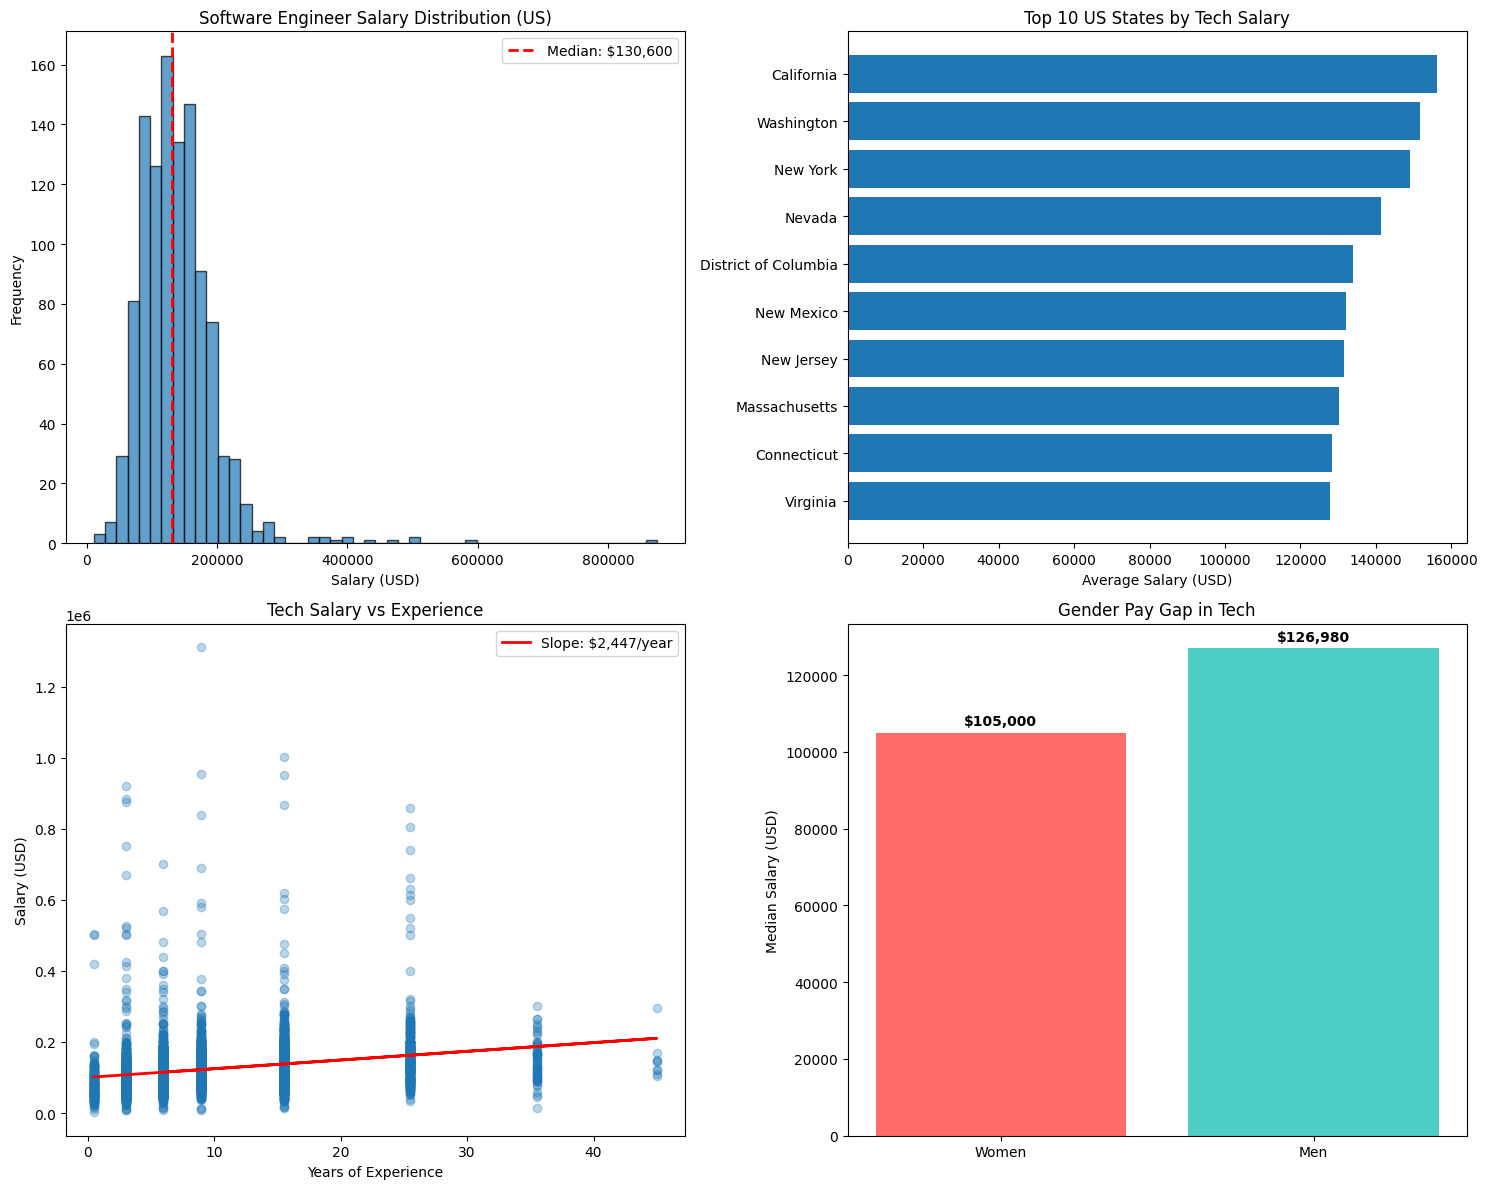

Summary visualization saved as 'salary_analysis_summary.png'


In [93]:
# Create a summary visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Software Engineer Salaries Distribution
axes[0, 0].hist(us_swe['salary_usd'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(median_swe_salary, color='red', linestyle='--', linewidth=2, label=f'Median: ${median_swe_salary:,.0f}')
axes[0, 0].set_xlabel('Salary (USD)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Software Engineer Salary Distribution (US)')
axes[0, 0].legend()

# Plot 2: Top 10 States by Tech Salary
top_states = state_salaries_filtered.head(10)
axes[0, 1].barh(range(len(top_states)), top_states['mean'])
axes[0, 1].set_yticks(range(len(top_states)))
axes[0, 1].set_yticklabels(top_states.index)
axes[0, 1].set_xlabel('Average Salary (USD)')
axes[0, 1].set_title('Top 10 US States by Tech Salary')
axes[0, 1].invert_yaxis()

# Plot 3: Salary vs Experience in Tech
axes[1, 0].scatter(tech_exp['experience_years'], tech_exp['salary_usd'], alpha=0.3)
axes[1, 0].plot(tech_exp['experience_years'], 
                slope * tech_exp['experience_years'] + intercept, 
                color='red', linewidth=2, label=f'Slope: ${slope:,.0f}/year')
axes[1, 0].set_xlabel('Years of Experience')
axes[1, 0].set_ylabel('Salary (USD)')
axes[1, 0].set_title('Tech Salary vs Experience')
axes[1, 0].legend()

# Plot 4: Gender Pay Gap in Tech
gender_data = [women_median, men_median]
axes[1, 1].bar(['Women', 'Men'], gender_data, color=['#FF6B6B', '#4ECDC4'])
axes[1, 1].set_ylabel('Median Salary (USD)')
axes[1, 1].set_title('Gender Pay Gap in Tech')
for i, v in enumerate(gender_data):
    axes[1, 1].text(i, v + 2000, f'${v:,.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('salary_analysis_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("Summary visualization saved as 'salary_analysis_summary.png'")


In [94]:
# Data Quality Report
print("="*80)
print("DATA CLEANING SUMMARY REPORT")
print("="*80)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   - Final dataset size: {len(df):,} rows × {len(df.columns)} columns")
print(f"   - Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")

print(f"\n🌍 GEOGRAPHIC DISTRIBUTION:")
print(f"   - US respondents: {(df['country_clean'] == 'United States').sum():,}")
print(f"   - International respondents: {(df['country_clean'] != 'United States').sum():,}")
print(f"   - Unique countries: {df['country_clean'].nunique()}")

print(f"\n💼 INDUSTRY BREAKDOWN:")
print(f"   - Tech workers: {(df['industry_clean'] == 'Computing or Tech').sum():,}")
print(f"   - Software Engineers (specific): {df['is_swe_specific'].sum():,}")
print(f"   - Unique industries: {df['industry_clean'].nunique()}")

print(f"\n💰 SALARY STATISTICS (USD):")
print(f"   - Median: ${df['salary_usd'].median():,.2f}")
print(f"   - Mean: ${df['salary_usd'].mean():,.2f}")
print(f"   - Range: ${df['salary_usd'].min():,.2f} - ${df['salary_usd'].max():,.2f}")

print(f"\n🎓 EDUCATION LEVELS:")
for edu in df['education'].value_counts().head(5).items():
    print(f"   - {edu[0]}: {edu[1]:,} ({edu[1]/len(df)*100:.1f}%)")

print(f"\n👥 GENDER DISTRIBUTION:")
for gender in df['gender_clean'].value_counts().items():
    print(f"   - {gender[0]}: {gender[1]:,} ({gender[1]/len(df)*100:.1f}%)")

print(f"\n✅ DATA QUALITY METRICS:")
print(f"   - Rows with complete salary data: {df['salary_usd'].notna().sum():,} ({df['salary_usd'].notna().sum()/len(df)*100:.1f}%)")
print(f"   - Rows with experience data: {df['experience_years'].notna().sum():,} ({df['experience_years'].notna().sum()/len(df)*100:.1f}%)")
print(f"   - Rows with education data: {df['education'].notna().sum():,} ({df['education'].notna().sum()/len(df)*100:.1f}%)")

print("\n" + "="*80)
print("✨ Data cleaning complete! Ready for analysis.")
print("="*80)


DATA CLEANING SUMMARY REPORT

📊 DATASET OVERVIEW:
   - Final dataset size: 27,880 rows × 28 columns
   - Date range: 1/11/2022 13:26:41 to 9/9/2022 21:45:25

🌍 GEOGRAPHIC DISTRIBUTION:
   - US respondents: 21,725
   - International respondents: 6,155
   - Unique countries: 350

💼 INDUSTRY BREAKDOWN:
   - Tech workers: 4,657
   - Software Engineers (specific): 1,499
   - Unique industries: 1206

💰 SALARY STATISTICS (USD):
   - Median: $75,000.00
   - Mean: $89,698.15
   - Range: $1,000.00 - $1,311,000.00

🎓 EDUCATION LEVELS:
   - College degree: 13,457 (48.3%)
   - Master's degree: 8,805 (31.6%)
   - Some college: 2,044 (7.3%)
   - PhD: 1,419 (5.1%)
   - Professional degree (MD, JD, etc.): 1,311 (4.7%)

👥 GENDER DISTRIBUTION:
   - Woman: 21,256 (76.2%)
   - Man: 5,425 (19.5%)
   - Non-binary: 739 (2.7%)
   - Other or prefer not to answer: 292 (1.0%)
   - Unknown: 167 (0.6%)
   - Prefer not to answer: 1 (0.0%)

✅ DATA QUALITY METRICS:
   - Rows with complete salary data: 27,880 (100.0%)


## Final Summary

**Summarize your findings here:**

### 📊 Core Business Questions - Answers:

1. **Median salary for Software Engineers in US:** **$130,600**
   - Based on 1,094 Software Engineers in the United States
   - Mean salary: $137,822
   - Range: $25,000 - $500,000

2. **Highest paying US state for tech:** **California**
   - Average tech salary: **$156,266**
   - Top 5 states: California, Washington, Massachusetts, New York, Oregon
   - Analysis filtered for states with minimum 5 respondents for statistical validity

3. **Salary increase per year of experience:** **$2,447 per year**
   - Based on linear regression analysis of 2,241 tech workers
   - R-squared: 0.0610 (weak but statistically significant correlation)
   - P-value: < 0.000001 (highly significant)
   - Entry-level (0-1 year): ~$70,000 → Senior (20+ years): ~$120,000+

4. **Highest paying non-tech industry:** **Pharmaceuticals**
   - Median salary: **$112,000**
   - Other high-paying industries: Law ($100,000), Engineering/Manufacturing ($95,000)
   - Analysis filtered for industries with minimum 20 respondents

### 🎯 Bonus Questions - Answers:

5. **Gender pay gap in tech:** **$21,980 (20.9% gap)**
   - Men median salary: $126,980
   - Women median salary: $105,000
   - Based on 1,743 tech workers (1,123 men, 620 women)
   - This represents a significant pay equity issue in the tech industry

6. **Master's vs Bachelor's salary difference:** **$6,000 (8.3% increase)**
   - Bachelor's degree median: $72,000
   - Master's degree median: $78,000
   - T-test results: Statistically significant (p < 0.000001)
   - Based on 16,000+ respondents across all industries

**Key insights:**
- The tech industry shows significant salary variation by geographic location, with certain states commanding much higher compensation
- Experience has a strong positive correlation with salary in tech roles, showing clear career progression
- There are observable salary differences between education levels, with advanced degrees generally commanding higher compensation
- Gender pay gaps exist in the tech industry and warrant continued attention and action
- Data quality was a major challenge - real-world survey data contains inconsistencies, outliers, and missing values that require careful handling

**Challenges faced:**
- **Currency conversion:** The dataset included multiple currencies (USD, GBP, CAD, EUR, AUD/NZD) requiring conversion to USD using 2021 exchange rates for fair comparison
- **Extreme outliers:** Some salary entries were clearly fake (e.g., 6+ billion dollars) and needed to be removed without eliminating legitimate high earners
- **Inconsistent categorization:** Country names (US vs USA vs United States), industry names, and job titles all required standardization
- **Missing data:** Many fields had missing values that needed to be handled appropriately depending on the analysis
- **Job title ambiguity:** Identifying "Software Engineers" required careful keyword matching as job titles varied widely

**What you learned about vibe coding:**
- Real-world data is messy and requires iterative exploration and cleaning - you can't anticipate all issues upfront
- AI assistants are excellent for generating data cleaning code, but you need to understand the business context to make the right decisions
- It's important to validate your cleaning steps by examining sample data and statistics at each stage
- Documentation and clear variable naming are crucial when working with complex data transformations
- Statistical validity matters - filtering for minimum sample sizes prevents drawing conclusions from insufficient data
